# Moduly pro symbolickou matematiku
SymPy 
- modul, který lze použít v jakémkoli Python programu
- dobrá podpora v Jupyter Notebook

Sage 
- kompletní a obsáhlý systém
- open source konkurent komerčním produktům

# SymPy
knihovna pro symbolickou matematiku

In [9]:
from IPython.display import IFrame
IFrame('https://ondrejcertik.com', 1000, 550)

In [ ]:
!python -m pip install sympy

In [2]:
#import sympy
from sympy import *

### Čísla v SymPy
výpočty symbolické

In [3]:
import math
print("math:", math.sqrt(8))        # standardní funkce Pythonu
# možnosti SymPy
print("sympy:", sqrt(8))            # textový výsrup SymPy
print("latex:", latex(sqrt(8)))     # možnost exportu do textových editorů
sqrt(8)                             # grafický výstup SymPy

math: 2.8284271247461903
sympy: 2*sqrt(2)
latex: 2 \sqrt{2}


2*sqrt(2)

vyhodnocení výrazu

In [57]:
print(N(sqrt(8)))
print(sqrt(8).evalf())
print(sqrt(8).evalf(3))         # na 3 platná čísla

display(pi)
print(pi.evalf(150))

2.82842712474619
2.82842712474619
2.83


pi

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940813


#### Desetinná čísla

In [5]:
print(1/2)
print(Rational(1, 2))           # racionální číslo
print(S(1)/2)                   # sympify (převádí objekt Pythonu na objekt SymPy)
Rational(1, 2)                  # grafický výstup

0.5
1/2
1/2


1/2

#### Zlomky

In [32]:
# bez SymPy
from fractions import Fraction
a = Fraction(3, 4)              # čitatel, jmenovatel
b = Fraction(4, 3)
a + b                           # opět typ Fraction

Fraction(25, 12)

In [33]:
# pomocí SymPy
a = Rational(3,4)
b = Rational(4,3)
print(a, b)
a+b

3/4 4/3


25/12

### Proměnné v SymPy

#### Definice proměnných
Symbol - nejdůležitější třída v SymPy
- základ pro symbolické výpočty (proměnné SymPy jsou objekty třídy Symbols)

Argument funkce Symbol() je řetězec obsahující symbol, který lze přiřadit proměnné
- proměnné musí být definovány pomocí symbols
- musí být definovány před použitím (jinak výjimka)

In [4]:
x = Symbol('x')         # nebo x = symbols('x')
x + 1/2

x + 0.5

- více proměnných oddělujeme mezerou nebo čárkou

In [7]:
x, y, z = symbols('x y z')      # oddělené čárkou nebo mezerou
z - 2*x + z                     # proměnné se seřadí automaticky

-2*x + 2*z

- můžeme definovat řecká písmena i indexy

In [8]:
alfa, psi, Psi = symbols("alpha psi Psi")   # řecká písmena
rs, rs2 = symbols("r_s, r_s^2")             # indexy
(alfa + Psi + psi) / (rs + rs2)

(Psi + alpha + psi)/(r_s + r_s^2)

Fungují i rozsahy - vrátí n-tici

In [9]:
print(symbols('a:5'))               # pod. jako range: 5 hodnot (0 až 4)
symbols('x(1:4)')                   # 1 až 3

(a0, a1, a2, a3, a4)


(x1, x2, x3)

Jiný způsob definování jednopísmenných proměnných
- pomocí modulu sympy.abc

In [10]:
from sympy.abc import u, v, w
u + 3*w - v

u - v + 3*w

Typy symbolických výrazů

In [18]:
print(type(x), type(x+v), type(3*x))

<class 'sympy.core.symbol.Symbol'> <class 'sympy.core.add.Add'> <class 'sympy.core.mul.Mul'>


### Výrazy

#### Pojmenování výrazu a práce s ním

In [5]:
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [6]:
expr + 1

x + 2*y + 1

In [7]:
expr - x

2*y

In [61]:
expr * x

x*(x + 2*y)

Operace s výrazy

In [6]:
expr3 = sin(x)**2 + cos(x)**2 
display(expr3)
simplify(expr3)                 # zjednodušení

sin(x)**2 + cos(x)**2

1

Existují i další varianty zjednodušení:
- trigsimp (trigonometrické fce)
- powsimp (mocniny)
- combsimp (kombinatorika)

In [13]:
expr2 = expand(expr * x)        # roznásobení
expr2

x**2 + 2*x*y

In [14]:
factor(expr2)                   # převedení na součin

x*(x + 2*y)

In [15]:
expr4 = expr2*x
factor_list(expr4)              # dvojice konstanta a seznam činitelů s mocninami

(1, [(x, 2), (x + 2*y, 1)])

#### Nahrazení (substituce)
- nahrazení všech výskytů 
    - číslem
    - jinou proměnnou
    - jiným výrazem

In [8]:
nu, phi = symbols("nu phi")
expr = 5 + x + x**2
display(expr)
print(expr.subs(x, 2))      # nahrazení číslem
display(expr.subs(x, nu))     # nahrazení jinou proměnnou
expr.subs(x, sin(phi))      # nahrazení jiným výrazem

x**2 + x + 5

11


nu**2 + nu + 5

sin(phi)**2 + sin(phi) + 5

Číselné vyhodnocení výrazu 

In [48]:
r = symbols("r")
expr=pi*r**2 
print("Vyhodnocení bez substituce:")
print("orig:  ", expr)
print("N:     ", N(expr))
print("evalf: ", expr.evalf())
print("subs:  ", expr.subs(r, 2))

print("\nVyhodnocení se substitucí:")
print("N:     ", N(expr.subs(r, 2)))
print("evalf>: ", expr.subs(r, 2).evalf())  # substituce do obecného vzorce, pak vyčíslení
print("evalf<: ", expr.evalf(subs = {r:2})) # vyčíslení, pak substituce


Vyhodnocení bez substituce:
orig:   pi*r**2
N:      3.14159265358979*r**2
evalf:  3.14159265358979*r**2
subs:   4*pi

Vyhodnocení se substitucí:
N:      12.5663706143592
evalf>:  12.5663706143592
evalf<:  12.5663706143592


### Funkce, integrace a derivace

In [18]:
#x, t, z, nu = symbols('x t z nu')
fce = sin(x) * exp(x)
fce

exp(x)*sin(x)

Derivace

In [19]:
dce = diff(fce, x)          # nebo jen diff(fce)
dce

exp(x)*sin(x) + exp(x)*cos(x)

Primitivní funkce
- integrační konstanta se nezobrazuje

In [20]:
int = integrate(dce, x)     # nebo jen integrate(dce)
int

exp(x)*sin(x)

In [21]:
integrate(1/x, x)

log(x)

Určitý integrál
- parametrem funkce a n-tice (proměnná, od, do)

In [22]:
integrate(sin(x**2), (x, -oo, oo))  # určitý integrál

sqrt(2)*sqrt(pi)/2

Limity

In [23]:
limit(sin(x)/x, x, 0)                       # výpočet limity

1

In [24]:
limit(1/x, x, oo)                           # limita v nekonečnu

0

In [25]:
print(limit(1/x, x, 0))                     # limita zprava
print(limit(1/x, x, 0, dir="+"))            # totéž (limita zprava)
print(limit(1/x, x, 0, dir="+-"))           # limita (-> complex infinity)
print(limit(1/x, x, 0, dir="-"))            # limita zleva

oo
oo
zoo
-oo


### Rovnice

In [26]:
F = x**2 - 2            # výraz
F

x**2 - 2

řešením rozumíme položení rovnosti nule a hledání kořenů

In [27]:
print(solve(x**2 - 2, x))       # řešení rovnice x^2 - 2 = 0
print(solve(F, x))              # zápis pomocí pojmenovaného výrazu
print(solve(F))                 # zjednodušený zápis (jedna proměnná)

[-sqrt(2), sqrt(2)]
[-sqrt(2), sqrt(2)]
[-sqrt(2), sqrt(2)]


Rovnice s nenulovou pravou stranou

In [28]:
Eq(F, 5)

Eq(x**2 - 2, 5)

In [29]:
solve(Eq(F, 5))

[-sqrt(7), sqrt(7)]

### Nedefinované funkce

In [30]:
f = Function('f')
f(x) + 1

f(x) + 1

Př.: Řešme obyčejnou diferenciální rovnici $y"− y = e^t$

In [31]:
y = Function('y')
t = Symbol('t')
# rovnice y′′− y = e^t
L = y(t).diff(t, t) - y(t)      # druhá derivace podle t (nebo diff(t, 2))     
R = exp(t)

print(solve(Eq(L, R), y(t)))    # pouze vyjádří y
dsolve(Eq(L, R), y(t))          # diferenciální rovnice

[-exp(t) + Derivative(y(t), (t, 2))]


Eq(y(t), C2*exp(-t) + (C1 + t/2)*exp(t))

### Matice

In [32]:
M = Matrix([[1, 2], [2, 2]]) 
M

Matrix([
[1, 2],
[2, 2]])

Hledání vlastních čísel a vlastních vektorů

In [33]:
print("Vlastní čísla:\n", M.eigenvals())
print("\nVlastní vektory:")
M.eigenvects()

Vlastní čísla:
 {3/2 - sqrt(17)/2: 1, 3/2 + sqrt(17)/2: 1}

Vlastní vektory:


[(3/2 - sqrt(17)/2,
  1,
  [Matrix([
   [-sqrt(17)/4 - 1/4],
   [                1]])]),
 (3/2 + sqrt(17)/2,
  1,
  [Matrix([
   [-1/4 + sqrt(17)/4],
   [                1]])])]

### Objekty, které se standardně nevyhodnocují

často nechceme ihned vypsat řešení, ale vypsat daný objekt

In [34]:
print(limit(sin(x)/x, x, 0))            # výpočet limity

L = Limit(sin(x)/x, x, 0, dir="+-")     # výpis objektu (limity)
print(L)                                # textový výstup
print(latex(L))                         # pro export do textových editorů
L                                       # grafický výstup

1
Limit(sin(x)/x, x, 0, dir='+-')
\lim_{x \to 0}\left(\frac{\sin{\left(x \right)}}{x}\right)


Limit(sin(x)/x, x, 0, dir='+-')

Vynucené vyhodnocení objektů 

In [35]:
L.doit()                                # provede výpočet

1

Derivace

In [36]:
fce = cos(x)**2
print(diff(fce))                        # provede derivaci

dce = Derivative(fce)                   # výpis derivace
dce

-2*sin(x)*cos(x)


Derivative(cos(x)**2, x)

Výpis nespecifikované funkce

In [37]:
x = Symbol('x')
f = Function('f')
g = Function('g')(x)                    # specifikována proměnná
print(f)
print(g)
g.diff(x)                               # nebo Derivative(g)

f
g(x)


Derivative(g(x), x)

Funkce více proměnných, parciální derivace

In [38]:
c, t = symbols('c t')
u = Function('u') (t, x)
L = Derivative(u, t, t)             # Derivative(f, (t, 2))
R = c**2 * Derivative(u, x, x)      # Derivative(f, (x, 2))
eq = Eq(L, R, evaluate = false)
eq

Eq(Derivative(u(t, x), (t, 2)), c**2*Derivative(u(t, x), (x, 2)))

In [39]:
x, y, sigma = symbols("x y sigma")
Phi = Function('Phi')(x, y, sigma)
def phi(x, y, sigma):
    return sqrt(x**2 + y**2 + sigma**2)

Eq(Derivative(phi(x, y, sigma), x), Derivative(Phi, x))

Eq(Derivative(sqrt(sigma**2 + x**2 + y**2), x), Derivative(Phi(x, y, sigma), x))

Integrace

In [40]:
print(integrate(cos(x)**2))             # provede integraci

F = Integral(cos(x)**2, (x, 0, pi))
print(latex(F))                         # pro import do textového editoru
F

x/2 + sin(x)*cos(x)/2
\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx


Integral(cos(x)**2, (x, 0, pi))

In [41]:
a = Integral(cos(x)*exp(x), x)
print(a)
print(a.doit())
Eq(a, a.doit())

Integral(exp(x)*cos(x), x)
exp(x)*sin(x)/2 + exp(x)*cos(x)/2


Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

### Vlastnosti

In [21]:
x = Symbol('x', real=True, positive=True)

print(x.is_complex)
print(x.is_real)
print(x.is_rational)
print(x.is_positive, x > 0)

True
True
None
True True


In [19]:
x = Symbol('x', real=True)
expr = 1 + (x - 2)**2       # pro reálná čísla vždy > 0
expr

(x - 2)**2 + 1

In [44]:
print(expr.is_positive)
expr2 = expr.expand()
print(expr2.is_positive)
expr2

True
None


x**2 - 4*x + 5

Při definici symbolu s různými názvy jsou si oba rovny

In [ ]:
x1 = symbols("x")
x2 = symbols("x")
print(x1 == x2)     # mají stejný název "x" a nebyly definovány s různými vlastnostmi

True


Pokud ale mají rozdílné vlastnosti (assumptions), nepovažují se za totožné

In [11]:
x1 = Symbol('x', positive=True)
x2 = Symbol('x')

print(x1, x2)
x1 == x2

x x


False

Vlastnosti můžeme zjistit pomocí atributů. Každý symbol má sadu logických vlastností (např. is_real, is_integer, is_positive)

In [15]:
x1 = symbols("x", real=True)
x2 = symbols("x", integer=True)

print(x1 == x2)                         # False - mají různé vlastnosti

print(x1.is_real, x2.is_real)           # reálné i integer jsou obě reálná
print(x1.is_integer, x2.is_integer)     # x1 může být integer, x2 je určitě
print(x1.is_positive)                   # nevíme

print()
print(x1.assumptions0)

False
True True
None True
None

{'real': True, 'commutative': True, 'complex': True, 'hermitian': True, 'extended_real': True, 'infinite': False, 'imaginary': False, 'finite': True}


V některých případech výraz zjednodušit nejde

In [46]:
expr = exp(sqrt(x**2))
expr

exp(Abs(x))

Funkce posify() nahradí všechny symboly ve výrazu symboly, které jsou kladné - mají vlastnost positive=True (a slovník obsahující mapování)

In [47]:
posify(expr)

(exp(_x), {_x: x})

In [48]:
y = Symbol('y', positive=True)
sqrt(y**2)

y

#### Vlastnost Q

Ke každému predikátu lze přistupovat prostřednictvím vlastnosti Q. 
- určení, zda je daný výraz pravdivý
- často se používá v kombinaci s funkcí ask
    - ověřuje, zda jsou dané předpoklady splněny
- např. Q.even vrací predikát, zda argument je sudé číslo. 

In [49]:
print(ask(Q.algebraic(pi)))         # pi není alg. číslo, je transcendentní
print(ask(Q.complex(5-4*I)), ask( Q.complex(100)))

False
True True


In [50]:
x,y = symbols("x y") 
x,y = 5,10 
print(ask(Q.prime(x)), ask(Q.prime(y)))
print(ask(Q.composite(x)), ask(Q.composite(y)))
print(ask(Q.even(x)), ask(Q.even(y)))

True False
False True
False True


In [51]:
x,y = 2*I, 4+5*I 
print(ask(Q.imaginary(x)), ask(Q.imaginary(y)))

True False


In [52]:
x,y = 5,10 
print(ask(Q.even(x)), ask(Q.even(y)), ask(Q.odd(x)), ask(Q.odd(y)))

False True True False


In [53]:
x,y = 5,-5 
print(ask(Q.positive(x)), ask(Q.negative(y)))
print(ask(Q.rational(pi)), ask(Q.irrational(S(2)/3)))
ask(Q.zero(oo)), ask(Q.nonzero(I))


True True
False False


(False, False)

### Analýza textového řetězce

In [54]:
str = 'x**2 - 1'
expr = parse_expr(str)
expr

x**2 - 1

In [55]:
expr = parse_expr('x**2 - 1', {'x':Symbol('x', positive=True)})
expr

x**2 - 1

### Spolupráce s numerickými knihovnami
- ve velkém rozsahu hodnot není funkce evalf() účinná (numpy je rychlejší)

sympy.lambdify slouží k převodu symbolických výrazů na funkce, které lze vyhodnotit numericky

Argumenty lambdify:
- symboly (použité ve výrazu)
- výraz (který chcete převést na funkci)
- modul (do nějž bude výsledná funkce převedena)
    - možné hodnoty 'math', 'numpy', 'numexpr', ...

In [1]:
from sympy import symbols, sin, lambdify
x = symbols('x')                # Definice symbolů
expr = sin(x)                   # Definice výrazu
f = lambdify(x, expr, 'numpy')  # Vytvoření funkce z výrazu

result = f(0.5)                 # Vyhodnocení funkce pro konkrétní hodnoty
print(result)

0.479425538604203


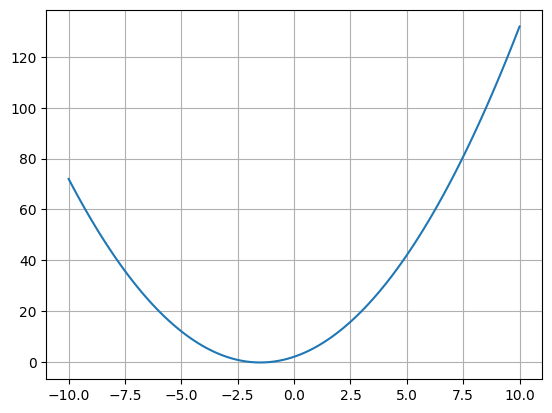

In [57]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')                 # Definice symbolu
expr = x**2 + 3*x + 2               # Definice symbolického výrazu

f = sp.lambdify(x, expr, 'numpy')   # Převod symbolického výrazu na funkci

x_vals = np.linspace(-10, 10, 100)  # Vytvoření hodnot x pro vykreslení grafu
y_vals = f(x_vals)                  # Vyhodnocení funkce pro dané hodnoty x

plt.plot(x_vals, y_vals)            # Vykreslení grafu pomocí matplotlib
plt.grid(True)
plt.show()


In [58]:
a, b = symbols('a b')
expr=a**2+b**2 
f=lambdify([a,b],expr)                  # do výrazu expr dosadí hodnoty a, b
f(2,3)

13

In [59]:
import numpy
f=lambdify([a,b],expr, "numpy")         # pro použití knihovny numpy
l1=numpy.arange(1,6) 
l2=numpy.arange(6,11) 
print(l1, l2)
f(l1,l2)

[1 2 3 4 5] [ 6  7  8  9 10]


array([ 37,  53,  73,  97, 125])

### Kreslení grafů

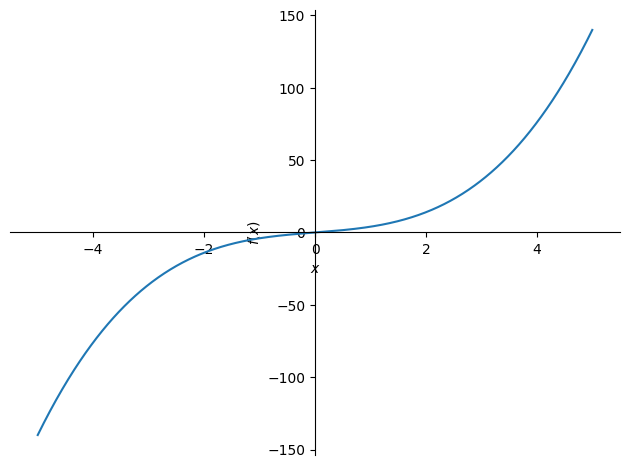

In [1]:
from sympy import *
x = symbols('x')
f = Function("f")
f = x**3 + 3*x
plotting.plot(f, (x,-5,5))

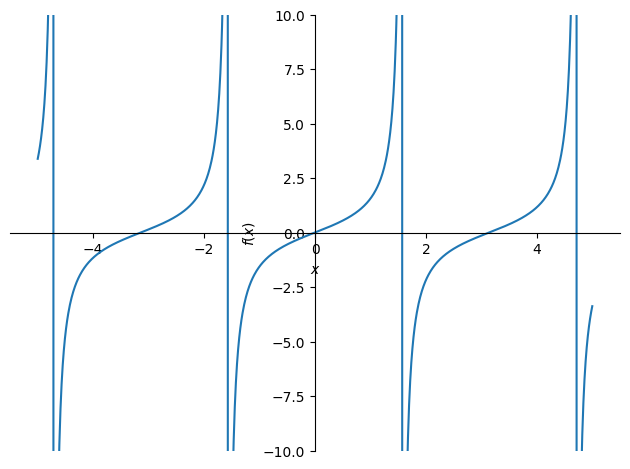

In [2]:
from sympy import *
x = symbols('x')
f = Function("f")
f = tan(x)
plotting.plot(f, (x,-5,5), ylim=(-10,10))

Interaktivní graf v jupyter notebooku

In [ ]:
%pip install ipywidgets

In [3]:
import sympy as sp
from ipywidgets import interact

# Definice symbolických proměnných a funkcí
a1, b1 = sp.symbols('a b')      # parametry z posuvníků
x = sp.symbols('x')             # x
expr = a1 * x**2 + b1           # y

# Definice interaktivní funkce pro vykreslení grafu
# Pokud uživatel změní hodnoty těchto widgetů, funkce plot_interactive se automaticky spustí s novými hodnotami a a b
@interact(a=(-5, 5, 0.1), b=(-5, 5, 0.1))   # a a b budou interaktivní s těmito mezemi
def plot_interactive(a=1, b=1):             # defaultní hodnoty
    # Vytvoření sympy výrazu pro dané hodnoty a a b
    expr_val = expr.subs({a1: a, b1: b})    # Nahrazujeme a1 a b1 jejich hodnotami a a b
    
    # Vykreslení grafu
    sp.plot(expr_val, show=True, xlim=(-5, 5), ylim=(-5, 5))


interactive(children=(FloatSlider(value=1.0, description='a', max=5.0, min=-5.0), FloatSlider(value=1.0, descr…

### Generování kódu
Vygenerované soubory obsahují implementaci matematické funkce
- C, C++, Fortran77, Fortran90, Julia, Rust, Octave/Matlab

In [79]:
x, y = symbols("x y")
# řekněme že chceme někde použít tento výsledek
f = sin( x * y**2) * exp(y)
f

exp(y)*sin(x*y**2)

In [82]:
from sympy.utilities.codegen import codegen
f_source = codegen(("f_C", f), "C", "f_C")
for s in f_source:
    print()
    for z in s:
        print(z)



f_C.c
/******************************************************************************
 *                      Code generated with SymPy 1.13.3                      *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "f_C.h"
#include <math.h>

double f_C(double x, double y) {

   double f_C_result;
   f_C_result = exp(y)*sin(x*pow(y, 2));
   return f_C_result;

}


f_C.h
/******************************************************************************
 *                      Code generated with SymPy 1.13.3                      *
 *                                                                            *
 *              See http:/